# Grey Level Co-occurrence Matrices 

http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix
http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_glcm.html

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops
from skimage import data

# Carrega a imagem

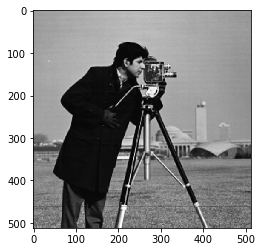

In [3]:
image = data.camera()

plt.imshow(image, cmap=plt.cm.gray)
plt.show()

# Seleciona 4 pedaços do céu e 4 pedaços da grama

## Isso é como definir áreas de interesse

In [4]:
PATCH_SIZE = 21
# seleciona partes da imagem da grama
grass_locations = [(474, 291), (440, 433), (466, 18), (462, 236)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# seleciona parte da imagem do ceu
sky_locations = [(54, 48), (21, 233), (90, 380), (195, 330)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])
    
import numpy as np
print(np.array(grass_patches).shape)    
print(np.array(sky_patches).shape)    

(4, 21, 21)
(4, 21, 21)


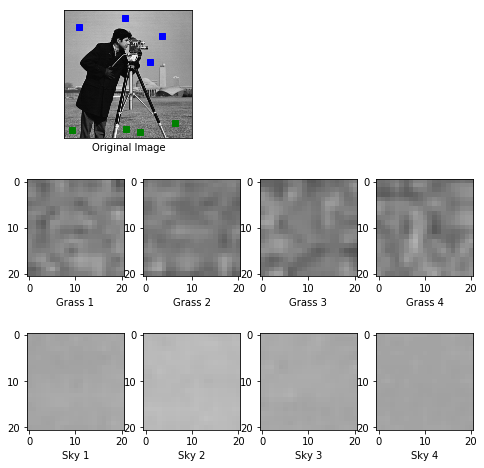

In [5]:
fig = plt.figure(figsize=(8, 8))

# mostra a imagem original com as partes marcadas

ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest',
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')     
    
# mostra as partes da imagem

for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, interpolation='nearest',
              vmin=0, vmax=255)
    ax.set_xlabel('Grass %d' % (i + 1))

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, interpolation='nearest',
              vmin=0, vmax=255)
    ax.set_xlabel('Sky %d' % (i + 1)) 
    
 
plt.show()

# Calcula o GLCM de cada pedaço

In [6]:
# Extrai GLCM de cada parte
# greycomatrix(image, distances, angles, levels=None, symmetric=False, normed=False)
# distances = pulos em pixels, ex: [1,3,5] 
# angulos sao com pi, ex: [0,  np.pi/4,  np.pi/2,  np.pi/4*3], 0== np.pi
# levels = valores maximos
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])
    print("dissimilarity: %f "%greycoprops(glcm, 'dissimilarity')[0,0]," correlation: %f "%greycoprops(glcm, 'correlation')[0, 0])
    

    

dissimilarity: 14.175595   correlation: -0.003222 
dissimilarity: 10.273810   correlation: 0.208601 
dissimilarity: 14.389881   correlation: 0.149493 
dissimilarity: 16.354167   correlation: 0.080218 
dissimilarity: 1.842262   correlation: 0.568590 
dissimilarity: 1.895833   correlation: 0.354310 
dissimilarity: 2.020833   correlation: 0.435675 
dissimilarity: 1.196429   correlation: 0.393512 


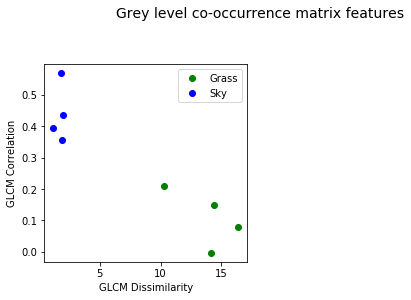

In [7]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(2, 2, 1)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go', label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo', label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14)
plt.show()